In [136]:
import requests
import importlib
from pprint import pprint
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import os

In [137]:
import models
importlib.reload(models)
import models

In [138]:
_ = load_dotenv(find_dotenv())

In [257]:
ALPHA_API_KEY = os.environ['ALPHA_API_KEY']
WINDOW = 60


In [258]:
data = pd.read_csv('AAPL.csv')
data.set_index('Date', inplace=True)
data = data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
data

,Open,High,Low,Close,Adj Close
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774
...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993


In [259]:
years = 5
s = years * 365
s

1825

In [260]:
def ma(ds, w):
	return np.array([
		np.concatenate((
			e[:w - 1], 
			np.convolve(e, np.ones(w), 'valid') / w)) 
			for e in ds.T]).T

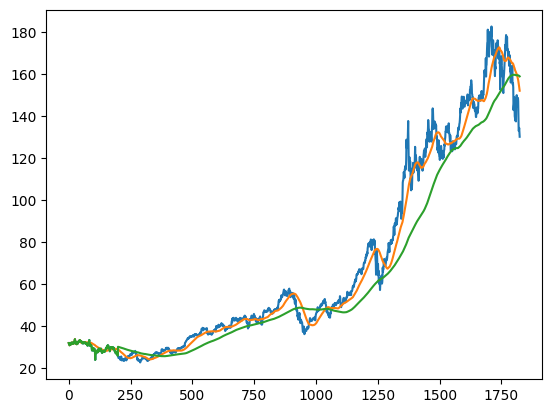

In [261]:
data_mat_np = data.to_numpy()
data_mat_np = data_mat_np[-s:]
plt.plot(data_mat_np[:, 0])
plt.plot(ma(data_mat_np, 50)[:, 0])
plt.plot(ma(data_mat_np, 200)[:, 0])
# plt.yscale('log')
# plt.xticks(range(ts.shape[0]), labels=list(data.index))


# data_mat = data_mat_np.tolist()
data_mat = np.hstack((data_mat_np, 
					  ma(data_mat_np, 50),
					  ma(data_mat_np, 200)))


{'2024-12-02': {'1. open': '237.2700', '2. high': '240.7900', '3. low': '237.1600', '4. close': '239.5900', '5. volume': '48137103'}, '2024-11-29': {'1. open': '234.8100', '2. high': '237.8100', '3. low': '233.9700', '4. close': '237.3300', '5. volume': '28481377'}, '2024-11-27': {'1. open': '234.4650', '2. high': '235.6900', '3. low': '233.8101', '4. close': '234.9300', '5. volume': '33498439'}, '2024-11-26': {'1. open': '233.3300', '2. high': '235.5700', '3. low': '233.3300', '4. close': '235.0600', '5. volume': '45986189'}, '2024-11-25': {'1. open': '231.4600', '2. high': '233.2450', '3. low': '229.7400', '4. close': '232.8700', '5. volume': '90152832'}, '2024-11-22': {'1. open': '228.0600', '2. high': '230.7199', '3. low': '228.0600', '4. close': '229.8700', '5. volume': '38168252'}, '2024-11-21': {'1. open': '228.8800', '2. high': '230.1550', '3. low': '225.7103', '4. close': '228.5200', '5. volume': '42108327'}, '2024-11-20': {'1. open': '228.0600', '2. high': '229.9300', '3. low

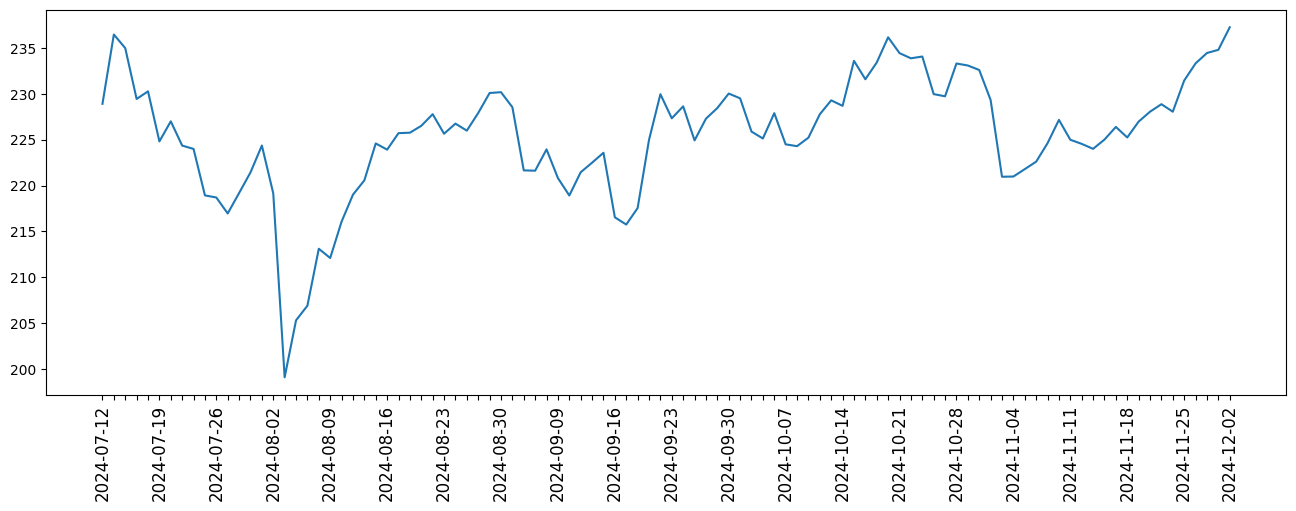

In [262]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=compact&apikey={ALPHA_API_KEY}'

par = 'Daily' if url.__contains__('DAILY') else '5min'

r = requests.get(url)
data = r.json()

# pprint(data)
print(data[f'Time Series ({par})'])


TS = list(map(lambda x: float(x['1. open']), data[f'Time Series ({par})'].values()))[::-1]
ticks = range(len(TS))
keys = list(data[f'Time Series ({par})'].keys())[::-1]

xlabels = [e if i % 5 == 0 else ' ' for i, e in enumerate(keys)]
xlabels[-1] = keys[-1]

plt.figure(figsize=(16, 5))
plt.plot(TS)
plt.xticks(ticks, labels=xlabels, rotation=90, fontsize=12)
plt.show()

In [263]:
# print((len(TS) * 5) / 60) 

In [264]:
# data[f'Time Series ({par})']

In [265]:
columns = data[f'Time Series ({par})'][keys[0]].keys()
columns

dict_keys(['1. open', '2. high', '3. low', '4. close', '5. volume'])

In [266]:
data_mat_api = list(map(lambda x: [float(x[e]) for e in columns], data[f'Time Series ({par})'].values()))[::-1]
data_mat_api = np.array(data_mat_api)
data_mat_api

array([[2.28920000e+02, 2.32640000e+02, 2.28680000e+02, 2.30540000e+02,
        5.30465270e+07],
       [2.36480000e+02, 2.37230000e+02, 2.33090000e+02, 2.34400000e+02,
        6.26312520e+07],
       [2.35000000e+02, 2.36270000e+02, 2.32330000e+02, 2.34820000e+02,
        4.32342780e+07],
       [2.29450000e+02, 2.31459900e+02, 2.26640000e+02, 2.28880000e+02,
        5.73458840e+07],
       [2.30280000e+02, 2.30440000e+02, 2.22270000e+02, 2.24180000e+02,
        6.60345850e+07],
       [2.24820000e+02, 2.26800000e+02, 2.23275000e+02, 2.24310000e+02,
        4.91514530e+07],
       [2.27010000e+02, 2.27780000e+02, 2.23090000e+02, 2.23960000e+02,
        4.82018350e+07],
       [2.24365000e+02, 2.26940000e+02, 2.22680000e+02, 2.25010000e+02,
        3.99602600e+07],
       [2.24000000e+02, 2.24800000e+02, 2.17130000e+02, 2.18540000e+02,
        6.17775760e+07],
       [2.18930000e+02, 2.20850000e+02, 2.14620000e+02, 2.17490000e+02,
        5.13911990e+07],
       [2.18700000e+02, 2.1949

In [290]:
sc = MinMaxScaler(feature_range=(0, 1))
data_mat_scaled = sc.fit_transform(data_mat)

In [291]:
# plt.plot(data_mat[:, :-1])
# plt.show()

In [306]:
X_seq = []
y_seq = []

for i in range(WINDOW, data_mat_scaled.shape[0]):
	X_seq.append(data_mat_scaled[i-WINDOW:i, :])
	y_seq.append(data_mat_scaled[i, :5])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

X_seq = torch.Tensor(X_seq)
y_seq = torch.Tensor(y_seq)


In [307]:
X_seq.shape, y_seq.shape

(torch.Size([1765, 60, 15]), torch.Size([1765, 5]))

In [294]:
split = 0.7
split = int(y_seq.shape[0] * split)

In [295]:
X_train, y_train = X_seq[:split], y_seq[:split]
X_val, y_val = X_seq[split:], y_seq[split:]

In [296]:
X_train.shape

torch.Size([1235, 60, 15])

In [297]:
lstm = models.LSTM(input_size=15, output_size=5, num_layers=1)
lstm(X_train).shape

torch.Size([1235, 5])

In [298]:
importlib.reload(models)
import models

In [299]:
models.train_model(lstm, X_train, y_train, lr=.01, epochs=30)

[1/30] - loss: 0.021976107731461525
[2/30] - loss: 0.011658404022455215
[3/30] - loss: 0.006237980909645557
[4/30] - loss: 0.00408314960077405
[5/30] - loss: 0.003974365070462227
[6/30] - loss: 0.0041631050407886505
[7/30] - loss: 0.0037658466026186943
[8/30] - loss: 0.0029341871850192547
[9/30] - loss: 0.0021756947971880436
[10/30] - loss: 0.0013147302670404315
[11/30] - loss: 0.0008367971749976277
[12/30] - loss: 0.0008526323363184929
[13/30] - loss: 0.000994111062027514
[14/30] - loss: 0.0011295193107798696
[15/30] - loss: 0.0011895546922460198
[16/30] - loss: 0.001067910809069872
[17/30] - loss: 0.0008197083370760083
[18/30] - loss: 0.0005976149695925415
[19/30] - loss: 0.00045401862007565796
[20/30] - loss: 0.00035821108031086624
[21/30] - loss: 0.00034616762422956526
[22/30] - loss: 0.00041408222750760615
[23/30] - loss: 0.0004587713920045644
[24/30] - loss: 0.0004577668441925198
[25/30] - loss: 0.00043994837324135005
[26/30] - loss: 0.00038490368751809
[27/30] - loss: 0.00031502

In [300]:
lstm.eval()
pred = lstm(X_train).detach()


In [301]:
pred.shape

torch.Size([1235, 5])

In [302]:
y_train.shape

torch.Size([1235, 5])

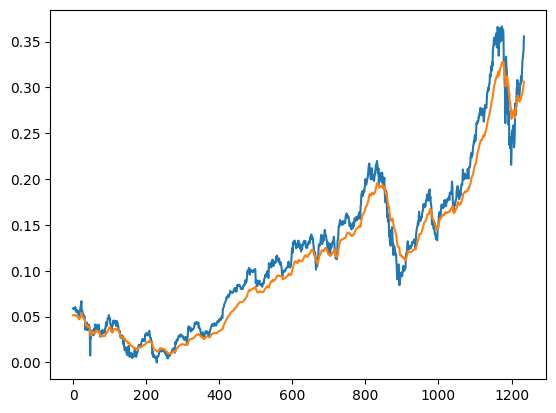

In [303]:
# plt.plot(data_mat[-(data_mat.shape[0] - WINDOW):, 0])
plt.plot(y_train[:, 0])
plt.plot(pred[:, 0])


In [304]:
pred_val = lstm(X_val).detach()

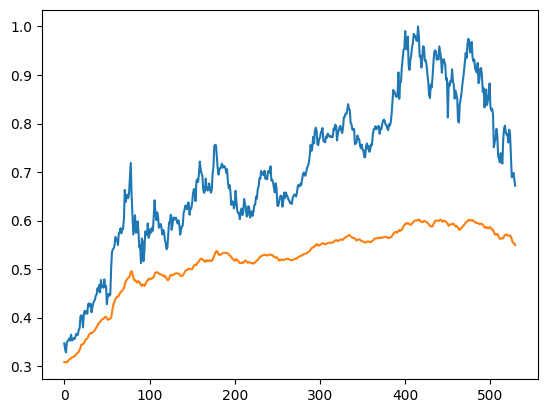

In [305]:
# plt.plot(data_mat[-(data_mat.shape[0] - WINDOW):, 0])
plt.plot(y_val[:, 0])
plt.plot(pred_val[:, 0])


In [182]:
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=demo'
r = req.get(url)
data = r.json()

pprint(data)

NameError: name 'req' is not defined

In [ ]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TOP_GAINERS_LOSERS&apikey=demo'
r = requests.get(url)
data = r.json()

pprint(data)

{'last_updated': '2024-11-15 16:15:58 US/Eastern',
 'metadata': 'Top gainers, losers, and most actively traded US tickers',
 'most_actively_traded': [{'change_amount': '0.0981',
                           'change_percentage': '52.4038%',
                           'price': '0.2853',
                           'ticker': 'CERO',
                           'volume': '1166494735'},
                          {'change_amount': '-0.0041',
                           'change_percentage': '-15.6489%',
                           'price': '0.0221',
                           'ticker': 'ELAB',
                           'volume': '356447065'},
                          {'change_amount': '-4.78',
                           'change_percentage': '-3.257%',
                           'price': '141.98',
                           'ticker': 'NVDA',
                           'volume': '246510902'},
                          {'change_amount': '0.3848',
                           'change_percentage': '43.4